# Chl-xTB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

import matplotlib
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
files = glob.glob("100ps_10fs_LHII_states_energies*.npy")

starting_frames = [re.findall(r"\d+",x)[2] for x in files]
starting_frames.sort()
starting_frames

['0', '1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000']

In [5]:
def read_splits(prop, n):

    res = [[] for i in range(n)]

    for i in starting_frames:
        split = np.load(f"100ps_10fs_LHII_{prop}_{int(i)}_{int(i)+999}.npy")

        assert(split.shape == (1000, n))

        for r in range(split.shape[1]):
            res[r] = np.concatenate((res[r], split[:,r]))
            
    return np.array(res)

In [6]:
states = read_splits("states_energies", 28)
states.shape

(28, 10000)

## Partition Function


$$ Z=\sum_i e^{-bE_i} $$

$$ U=\sum_i w_i E_i $$

$$ w_i = \frac{e^{-bE_i}}{Z} $$

$$ b=\frac{1}{kT} $$

In [7]:
excitation_energies = [[] for x in range(27)]

for i in range(1, states.shape[0]):
    excitation_energies[i-1] = states[i] - states[0]
    
excitation_energies = np.array(excitation_energies)

In [8]:
boltzmann_eV = 8.617333262145e-5 # eV / K
hr_to_eV = 27.2114 # eV / hr

T = 300 # K 

beta = 1 / (boltzmann_eV * T)

E = excitation_energies * hr_to_eV

boltz_factor = np.exp(-beta * E)

Z = np.sum(boltz_factor, axis=0)

w = boltz_factor / Z

In [9]:
U = np.sum(E * w, axis=0)

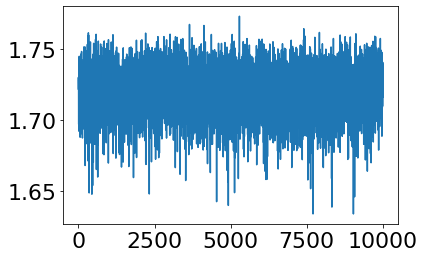

In [10]:
plt.plot(U)

## Spectral Density

In [11]:
import sys
sys.path.append("../analysis/")

import analysis

In [12]:
def first_half(arr):
    return arr[1:len(arr)//2]

In [13]:
U_rel = U - np.mean(U)
autocorr, spectrum, spectrum_normal_domain = analysis.spectrum_and_domain(U_rel, 10)

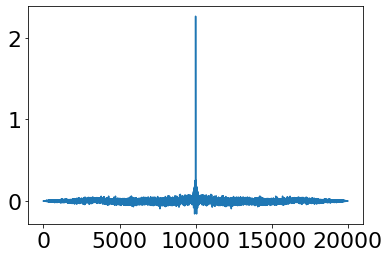

In [48]:
plt.plot(autocorr[:len(autocorr)//5])

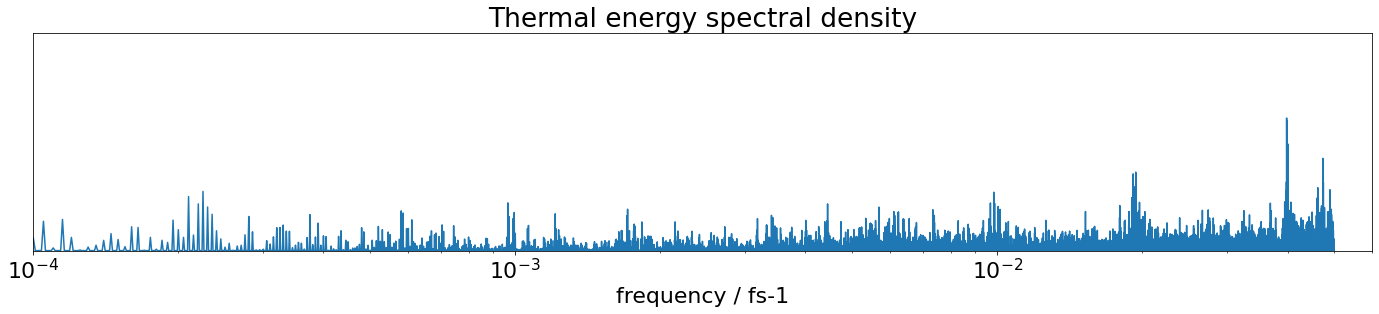

In [14]:
fig, ax = plt.subplots()

ax.plot(first_half(spectrum_normal_domain), first_half(np.abs(spectrum)))
ax.set_ylim(0, )

ax.set_xlim(1e-4, 6e-2)
ax.set_xscale('log')

fig.set_size_inches(24, 4)
ax.set_title("Thermal energy spectral density")
ax.set_xlabel("frequency / fs-1")
ax.set_yticks([]);

Text(0.5, 0, 'frequency / fs-1')

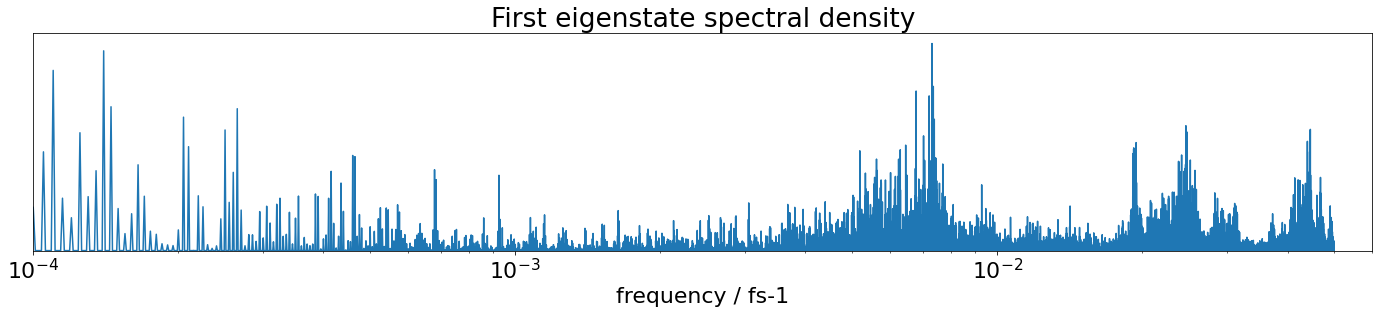

In [45]:
def spectrum_eigenstate(all_data, ax, i):
    eig_rel = all_data[i] - np.mean(all_data[i])
    autocorr, spectrum, spectrum_normal_domain = analysis.spectrum_and_domain(eig_rel, 10)

    ax.plot(first_half(spectrum_normal_domain), first_half(np.abs(spectrum)))
    

fig, ax = plt.subplots()

spectrum_eigenstate(states, ax, 0)
#spectrum_eigenstate(all_data, ax, 0)

ax.set_ylim(0,)
ax.set_xlim(1e-4, 6e-2)
ax.set_xscale('log')

ax.set_yticks([])
fig.set_size_inches(24, 4)

ax.set_title("First eigenstate spectral density")
ax.set_xlabel("frequency / fs-1")

In [17]:
time_ranges = np.ptp(states, axis=0)
assert(time_ranges.shape[0] == 10000)

state_ranges = np.var(states, axis=1)
assert(state_ranges.shape[0] == 28)

print(f"""
(average) range of energies along the time series : {np.mean(time_ranges):3.6f}
(average) range of energies along the state series: {np.mean(state_ranges):3.3f}
""")


(average) range of energies along the time series : 0.070881
(average) range of energies along the state series: 0.023



Text(0.5, 0, 'frequency / fs-1')

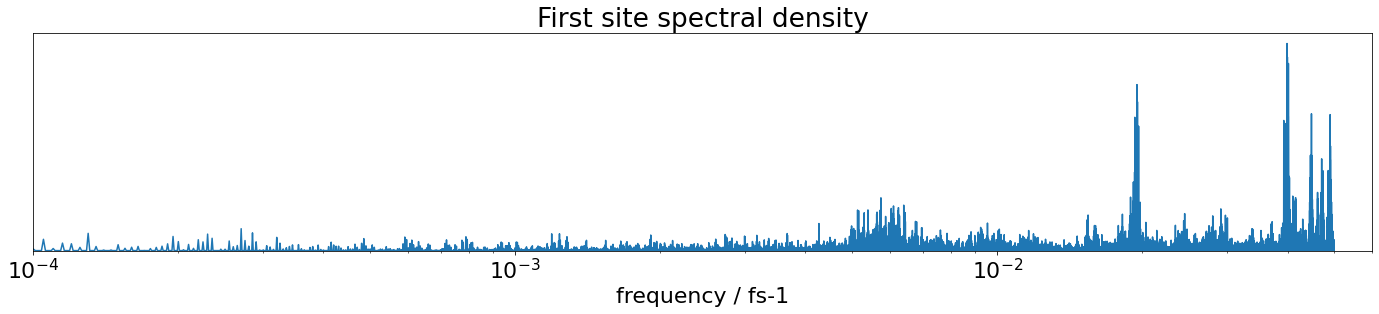

In [46]:
site_energies = read_splits("transition_energies", 27)

def spectrum_site_energy(energies, ax, i):
    energy_rel = energies[i] - np.mean(energies[i])
    autocorr, spectrum, spectrum_normal_domain = analysis.spectrum_and_domain(energy_rel, 10)

    ax.plot(first_half(spectrum_normal_domain), first_half(np.abs(spectrum)))
    

fig, ax = plt.subplots()

spectrum_site_energy(site_energies, ax, 0)
#spectrum_eigenstate(all_data, ax, 0)

ax.set_ylim(0, )
ax.set_xlim(1e-4, 6e-2)
ax.set_xscale('log')

ax.set_yticks([])
fig.set_size_inches(24, 4)

ax.set_title("First site spectral density")
ax.set_xlabel("frequency / fs-1")